<a href="https://colab.research.google.com/github/ranadeepbhuyan/cancer-mri-analysis/blob/main/analysis_relationship_between_survival_days_vs_brain_tumor__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

Survivale rate against volume of the tumor vs the volm of the brain (%)


In [ ]:
import pandas as pd
import numpy as np

data =  pd.read_csv('/content/Copy of UPENN-GBM_clinical_info_v1.1_modified - UPENN-GBM_clinical_info_v1.1_modified.csv')

In [ ]:
df = pd.DataFrame(data)

load the csv file into Dataframe

remove the rows that donot have fixed survival from surgery days

In [ ]:

element_to_remove = 'alive'
element_to_remove2 = 'dead'
filtered_df = df[df['Survival_from_surgery_days'] != element_to_remove]
filtered_df

,ID,Gender,Age_at_scan_years,Survival_from_surgery_days,IDH1,MGMT,EOR,WHO_CNS_Grade,MGMT_Status,brain_total_surface_area_in_cm^2,brain_tumor_total_surface_area_in_cm^2,Tumor_surface_area_%,brain_tvolume_in_cm^3,brain_tumor_volume_in_cm^3,brain_tumor_%
1,UPENN-GBM-00071_11,F,61.0,291,Wildtype,NONE,GTR,1.0,NONE,3593.0,534.0,14.86223212,1432.998,200.670,14.00
5,UPENN-GBM-00071_11,M,53.0,626,Wildtype,NONE,GTR,1.0,NONE,4122.0,190.0,4.609412906,1647.625,69.422,4.21
7,UPENN-GBM-00071_11,F,55.0,469,Wildtype,NONE,GTR,1.0,NONE,3260.0,86.0,2.63803681,1299.476,29.802,2.29
8,UPENN-GBM-00071_11,M,69.0,561,Wildtype,NONE,GTR,1.0,NONE,4240.0,345.0,8.136792453,1694.407,122.223,7.21
10,UPENN-GBM-00071_11,F,40.0,798,NOS/NEC,NONE,GTR,3.0,NONE,4001.0,281.0,7.023244189,1597.870,104.046,6.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN
689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN
690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN
691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN


In [ ]:
filtered_df2 = filtered_df[filtered_df['Survival_from_surgery_days'] != element_to_remove2]

Remove rows that have empty columns

In [ ]:
cleaned_df = filtered_df2.dropna()
cleaned_df

,ID,Gender,Age_at_scan_years,Survival_from_surgery_days,IDH1,MGMT,EOR,WHO_CNS_Grade,MGMT_Status,brain_total_surface_area_in_cm^2,brain_tumor_total_surface_area_in_cm^2,Tumor_surface_area_%,brain_tvolume_in_cm^3,brain_tumor_volume_in_cm^3,brain_tumor_%
1,UPENN-GBM-00071_11,F,61.0,291,Wildtype,NONE,GTR,1.0,NONE,3593.0,534.0,14.86223212,1432.998,200.670,14.00
5,UPENN-GBM-00071_11,M,53.0,626,Wildtype,NONE,GTR,1.0,NONE,4122.0,190.0,4.609412906,1647.625,69.422,4.21
7,UPENN-GBM-00071_11,F,55.0,469,Wildtype,NONE,GTR,1.0,NONE,3260.0,86.0,2.63803681,1299.476,29.802,2.29
8,UPENN-GBM-00071_11,M,69.0,561,Wildtype,NONE,GTR,1.0,NONE,4240.0,345.0,8.136792453,1694.407,122.223,7.21
10,UPENN-GBM-00071_11,F,40.0,798,NOS/NEC,NONE,GTR,3.0,NONE,4001.0,281.0,7.023244189,1597.870,104.046,6.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,UPENN-GBM-00071_11,M,81.0,33,Wildtype,UnMethylated,GTR,1.0,Negative,4440.0,412.0,9.279279279,1775.614,152.921,8.61
603,UPENN-GBM-00071_11,M,28.0,36,Wildtype,UnMethylated,STR,1.0,Negative,3420.0,100.0,2.923976608,1362.127,37.188,2.73
604,UPENN-GBM-00071_11,M,36.0,Dead,Mutated,Methylated,PR,4.0,Positive,3906.0,276.0,7.066052227,1560.319,99.594,6.38
609,UPENN-GBM-00071_11,M,41.0,Dead,Mutated,Methylated,PR,4.0,Positive,3897.0,18.0,0.4618937644,1555.461,6.180,0.40


In [ ]:
index = cleaned_df.index.values.tolist()

In [ ]:
len(index)

439

In [ ]:
index2 = []
for i in range(0,20):
  index2.append(index[i])

In [ ]:
y_axi1 = cleaned_df['Survival_from_surgery_days'].head(20).values.tolist()

In [ ]:
scale the values of survival form surgery days to a range of 0 to 100 and save it in another column named 'scaled_numbers'

In [ ]:
cleaned_df['Survival_from_surgery_days']= pd.to_numeric(cleaned_df['Survival_from_surgery_days'], errors='coerce')
# Min-Max scaling to transform the range to 1 to 100
min_value = cleaned_df['Survival_from_surgery_days'].min()
max_value = cleaned_df['Survival_from_surgery_days'].max()
cleaned_df['scaled_numbers'] = 1 + ((cleaned_df['Survival_from_surgery_days']- min_value) / (max_value - min_value)) * 99
cleaned_df = cleaned_df.dropna()
cleaned_df


scale the values of brain tumor percentage to a range of 0 to 100 and save it in another column named 'scaled_numbers2'

In [ ]:
cleaned_df['brain_tumor_%']= pd.to_numeric(cleaned_df['brain_tumor_%'], errors='coerce')
# Min-Max scaling to transform the range to 1 to 100
min_value = cleaned_df['brain_tumor_%'].min()
max_value = cleaned_df['brain_tumor_%'].max()
cleaned_df['scaled_numbers2'] = 1 + ((cleaned_df['brain_tumor_%']- min_value) / (max_value - min_value)) * 99
cleaned_df = cleaned_df.dropna()
cleaned_df

<ipython-input-125-502c72acedf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['brain_tumor_%']= pd.to_numeric(cleaned_df['brain_tumor_%'], errors='coerce')
<ipython-input-125-502c72acedf6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['scaled_numbers2'] = 1 + ((cleaned_df['brain_tumor_%']- min_value) / (max_value - min_value)) * 99


,ID,Gender,Age_at_scan_years,Survival_from_surgery_days,IDH1,MGMT,EOR,WHO_CNS_Grade,MGMT_Status,brain_total_surface_area_in_cm^2,brain_tumor_total_surface_area_in_cm^2,Tumor_surface_area_%,brain_tvolume_in_cm^3,brain_tumor_volume_in_cm^3,brain_tumor_%,scaled_numbers,scaled_numbers2
1,UPENN-GBM-00071_11,F,61.0,291.0,Wildtype,NONE,GTR,1.0,NONE,3593.0,534.0,14.86223212,1432.998,200.670,14.00,13.936479,73.677523
5,UPENN-GBM-00071_11,M,53.0,626.0,Wildtype,NONE,GTR,1.0,NONE,4122.0,190.0,4.609412906,1647.625,69.422,4.21,28.984120,21.931127
7,UPENN-GBM-00071_11,F,55.0,469.0,Wildtype,NONE,GTR,1.0,NONE,3260.0,86.0,2.63803681,1299.476,29.802,2.29,21.931942,11.782702
8,UPENN-GBM-00071_11,M,69.0,561.0,Wildtype,NONE,GTR,1.0,NONE,4240.0,345.0,8.136792453,1694.407,122.223,7.21,26.064428,37.788041
10,UPENN-GBM-00071_11,F,40.0,798.0,NOS/NEC,NONE,GTR,3.0,NONE,4001.0,281.0,7.023244189,1597.870,104.046,6.51,36.710073,34.088094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,UPENN-GBM-00071_11,M,68.0,273.0,Wildtype,UnMethylated,STR,1.0,Negative,3657.0,363.0,9.926168991,1460.228,133.045,9.11,13.127949,47.830753
601,UPENN-GBM-00071_11,F,73.0,80.0,Wildtype,Indeterminate,STR,1.0,Indeterminate,3623.0,373.0,10.29533536,1444.746,133.291,9.23,4.458711,48.465029
602,UPENN-GBM-00071_11,M,81.0,33.0,Wildtype,UnMethylated,GTR,1.0,Negative,4440.0,412.0,9.279279279,1775.614,152.921,8.61,2.347550,45.187934
603,UPENN-GBM-00071_11,M,28.0,36.0,Wildtype,UnMethylated,STR,1.0,Negative,3420.0,100.0,2.923976608,1362.127,37.188,2.73,2.482305,14.108382


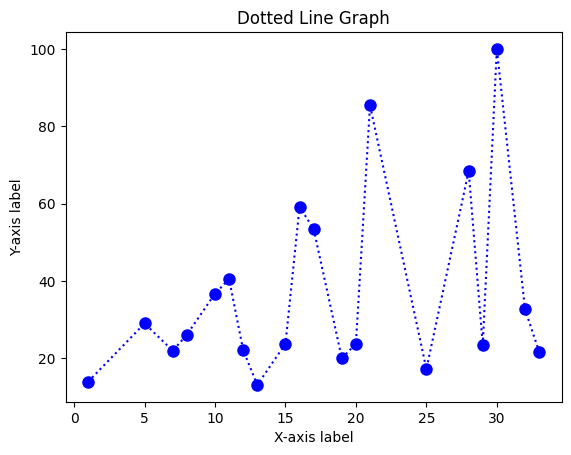

In [ ]:

plt.plot( index2, cleaned_df['scaled_numbers'].head(20), linestyle='dotted', marker='o', markersize=8, color='b')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Dotted Line Graph')

plt.show()

Visualising the numbers on a graph to see

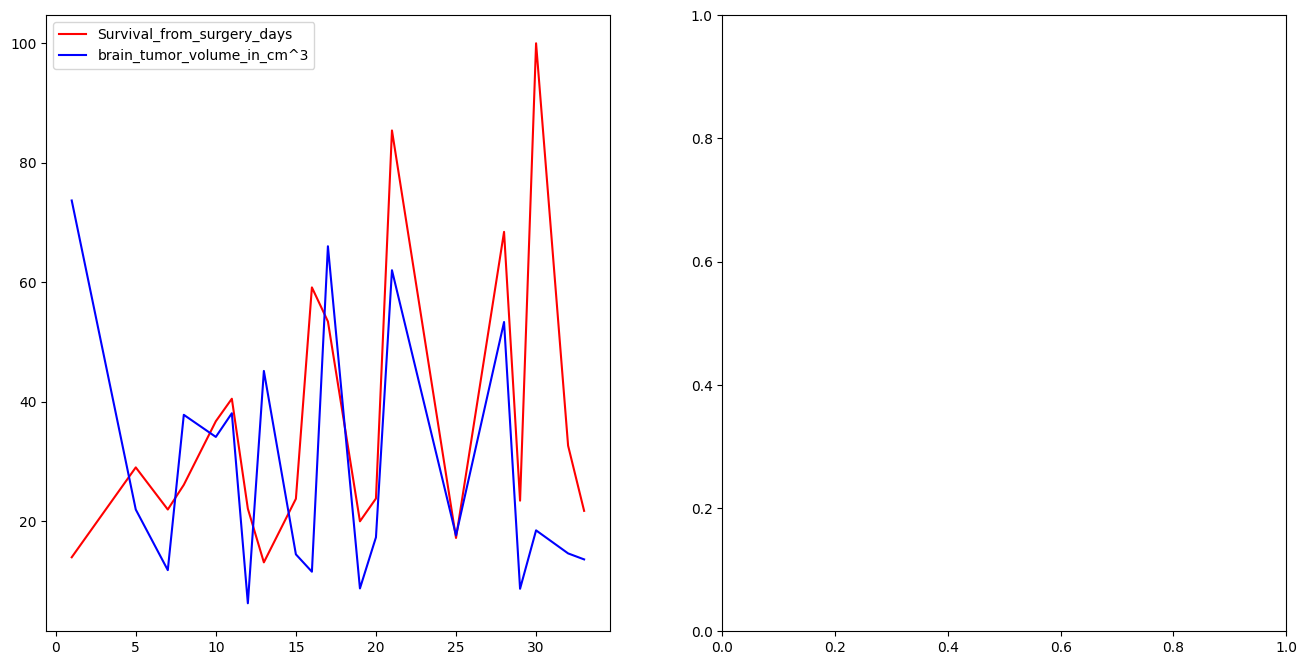

In [ ]:
acc=cleaned_df['scaled_numbers'].head(20)
val_acc=cleaned_df['scaled_numbers2'].head(20)


f,ax=plt.subplots(1,2,figsize=(16,8))

ax[0].plot(index2,acc,'r',label='Survival_from_surgery_days')


#ax[1].plot(epoch,loss,'b',label='Training Loss')
ax[0].plot(index2,val_acc,'b',label='brain_tumor_volume_%')
ax[0].legend()


plt.show()

In [ ]:
Difference between the scaled numbers in order to calculate the corelation between tumar-percentage and survival days

In [ ]:
cleaned_df ['difference'] = cleaned_df['scaled_numbers'] - cleaned_df['scaled_numbers2']


In [ ]:
cleaned_df ['difference'] = cleaned_df ['difference'].abs()
cleaned_df ['difference']

1      59.741044
5       7.052993
7      10.149240
8      11.723612
10      2.621979
         ...    
600    34.702804
601    44.006318
602    42.840384
603    11.626077
610    15.880512
Name: difference, Length: 430, dtype: float64

In [ ]:
cleaned_df
new_column_names = {
    'scaled_numbers': 'normalized_survival_days',
    'scaled_numbers2': 'normalized_brain_tumor_%',
}

cleaned_df.rename(columns=new_column_names, inplace=True)
cleaned_df

,ID,Gender,Age_at_scan_years,Survival_from_surgery_days,IDH1,MGMT,EOR,WHO_CNS_Grade,MGMT_Status,brain_total_surface_area_in_cm^2,brain_tumor_total_surface_area_in_cm^2,Tumor_surface_area_%,brain_tvolume_in_cm^3,brain_tumor_volume_in_cm^3,brain_tumor_%,normalized_survival_days,normalized_brain_tumor_%,difference
1,UPENN-GBM-00071_11,F,61.0,291.0,Wildtype,NONE,GTR,1.0,NONE,3593.0,534.0,14.86223212,1432.998,200.670,14.00,13.936479,73.677523,59.741044
5,UPENN-GBM-00071_11,M,53.0,626.0,Wildtype,NONE,GTR,1.0,NONE,4122.0,190.0,4.609412906,1647.625,69.422,4.21,28.984120,21.931127,7.052993
7,UPENN-GBM-00071_11,F,55.0,469.0,Wildtype,NONE,GTR,1.0,NONE,3260.0,86.0,2.63803681,1299.476,29.802,2.29,21.931942,11.782702,10.149240
8,UPENN-GBM-00071_11,M,69.0,561.0,Wildtype,NONE,GTR,1.0,NONE,4240.0,345.0,8.136792453,1694.407,122.223,7.21,26.064428,37.788041,11.723612
10,UPENN-GBM-00071_11,F,40.0,798.0,NOS/NEC,NONE,GTR,3.0,NONE,4001.0,281.0,7.023244189,1597.870,104.046,6.51,36.710073,34.088094,2.621979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,UPENN-GBM-00071_11,M,68.0,273.0,Wildtype,UnMethylated,STR,1.0,Negative,3657.0,363.0,9.926168991,1460.228,133.045,9.11,13.127949,47.830753,34.702804
601,UPENN-GBM-00071_11,F,73.0,80.0,Wildtype,Indeterminate,STR,1.0,Indeterminate,3623.0,373.0,10.29533536,1444.746,133.291,9.23,4.458711,48.465029,44.006318
602,UPENN-GBM-00071_11,M,81.0,33.0,Wildtype,UnMethylated,GTR,1.0,Negative,4440.0,412.0,9.279279279,1775.614,152.921,8.61,2.347550,45.187934,42.840384
603,UPENN-GBM-00071_11,M,28.0,36.0,Wildtype,UnMethylated,STR,1.0,Negative,3420.0,100.0,2.923976608,1362.127,37.188,2.73,2.482305,14.108382,11.626077


Visulation of difference and brain tumar %

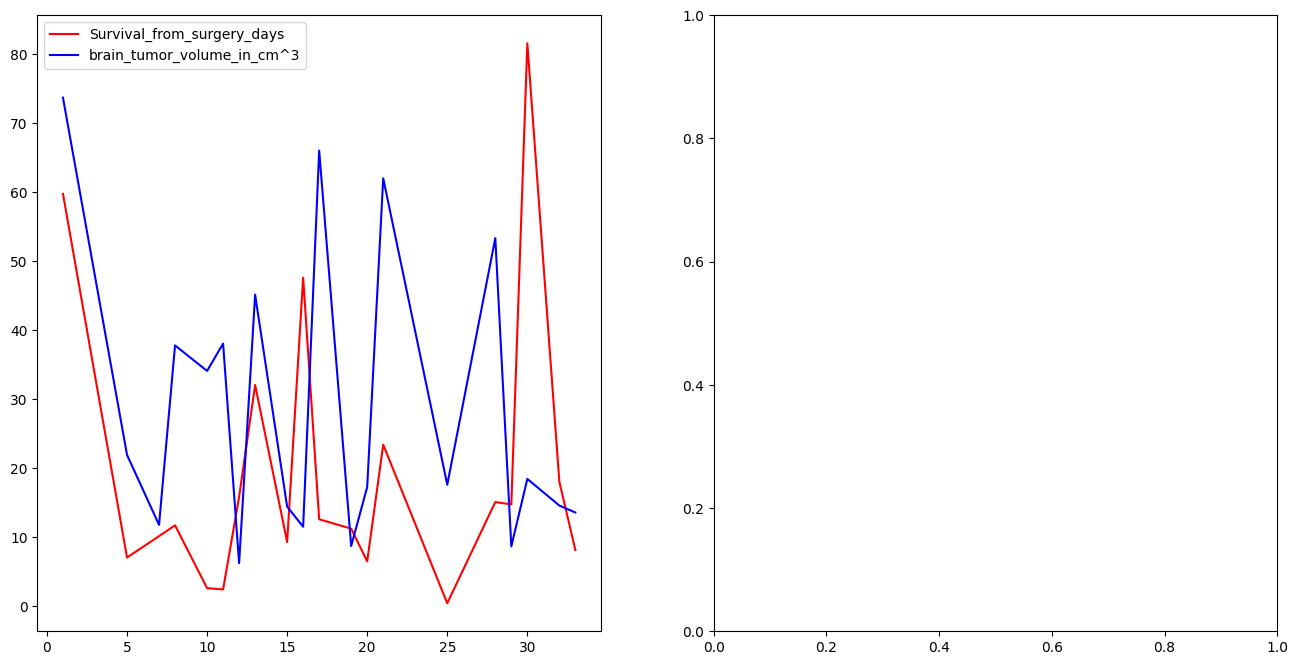

In [ ]:
acc=cleaned_df['difference'].head(20)
val_acc=cleaned_df['scaled_numbers2'].head(20)


f,ax=plt.subplots(1,2,figsize=(16,8))

ax[0].plot(index2,acc,'r',label='Survival_from_surgery_days')


#ax[1].plot(epoch,loss,'b',label='Training Loss')
ax[0].plot(index2,val_acc,'b',label='brain_tumor_volume_%')
ax[0].legend()


plt.show()

In [ ]:
Finding the corelation between difference and brain tumar %

In [ ]:
correlation = cleaned_df['difference'].corr(cleaned_df['scaled_numbers2'])

In [ ]:
correlation

0.588659108080689

In [ ]:
Min_Value = -1
Max_Value = 1

In [ ]:
Since corelation function output a value of -1 to 1 so using min max scaling we convert it to 0 to 100

In [ ]:
Scaled_Value = ((correlation - Min_Value) / (Max_Value - Min_Value)) * 100


In [ ]:
Scaled_Value

79.43295540403446

In [ ]:
Saving the dataset for more analysis between other columns

In [ ]:
cleaned_df.to_csv('dataset_final_for_analysis.csv')